Name - Aditya Kothari

Roll no. - I028

Batch - B1

1. Time Plot

2. Find the trend(estimate) using MA(12) -> centered MA and plot.

3. De-Trend the data (Seasonality + Residuals) and plot it

4. Estimating St and plotting

5. Rt = Yt - St - Tt and plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data
file_path = '/content/AirPassengers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Time Plot

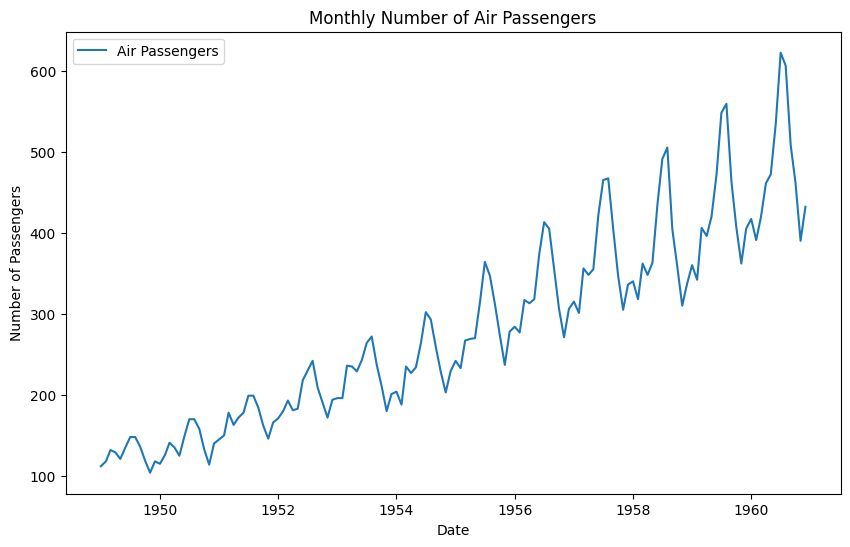

In [ ]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Air Passengers')
plt.title('Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [ ]:
data

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


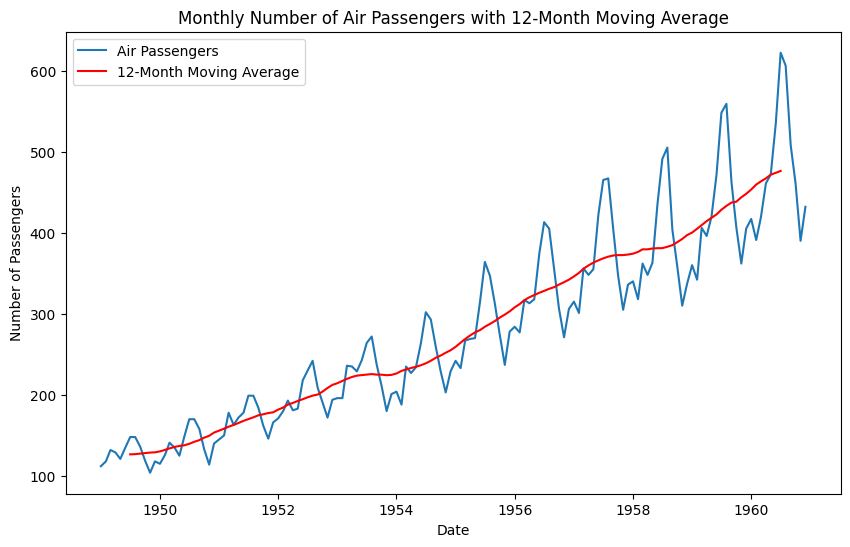

In [ ]:
# Calculate centered moving average with a window of 12 months
data['MA12'] = data['value'].rolling(window=12, center=True).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(data['value'], label='Air Passengers')
plt.plot(data['MA12'], label='12-Month Moving Average', color='red')
plt.title('Monthly Number of Air Passengers with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


De-Trend

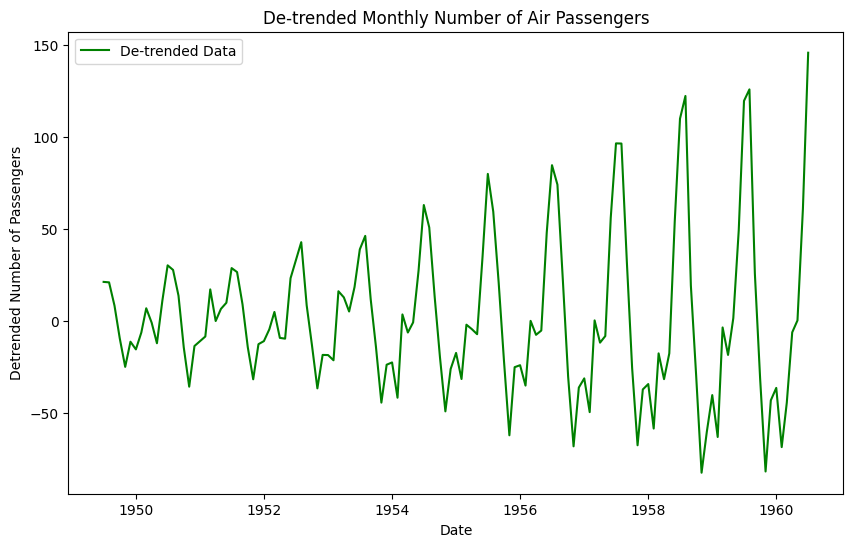

In [ ]:
# De-trend the data
data['Detrended'] = data['value'] - data['MA12']

# Plot the de-trended data
plt.figure(figsize=(10, 6))
plt.plot(data['Detrended'], label='De-trended Data', color='green')
plt.title('De-trended Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Detrended Number of Passengers')
plt.legend()
plt.show()


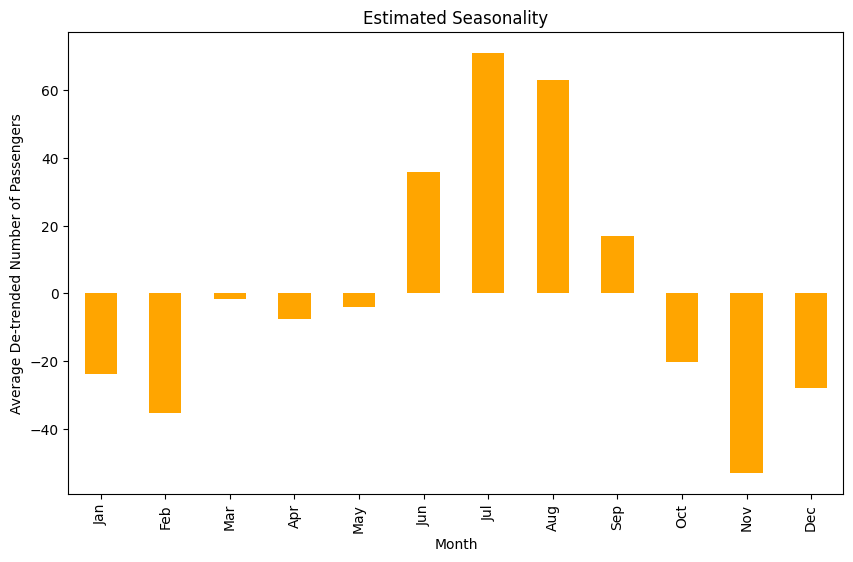

In [ ]:
# Group the data by month to estimate seasonality
monthly_avg = data.groupby(data.index.month)['Detrended'].mean()
monthly_avg.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the seasonality
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='orange')
plt.title('Estimated Seasonality')
plt.xlabel('Month')
plt.ylabel('Average De-trended Number of Passengers')
plt.show()


<ipython-input-12-7178a6f1a164>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seasonality = data.index.map(lambda d: monthly_avg[d.month - 1])


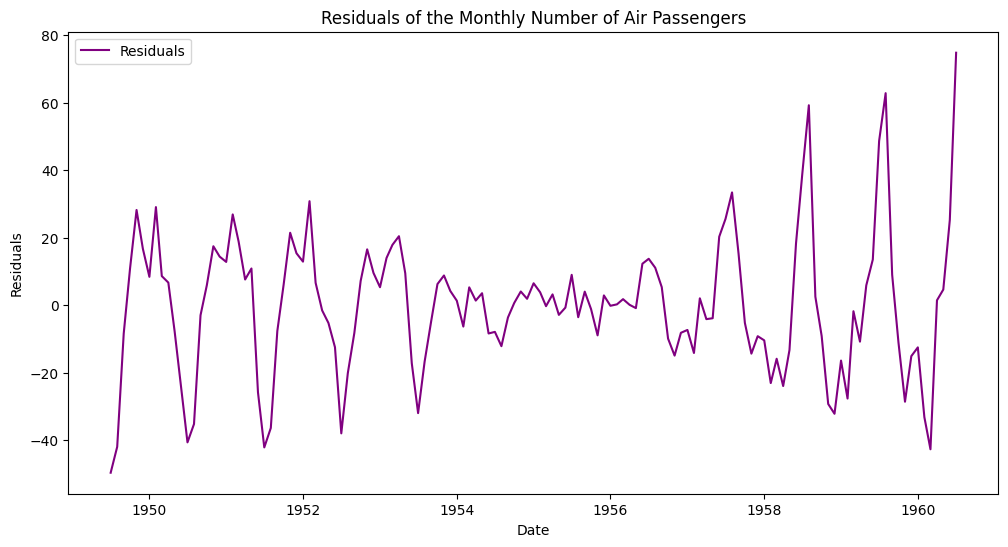

In [ ]:
# Extend the monthly seasonality to match the data length
seasonality = data.index.map(lambda d: monthly_avg[d.month - 1])

# Calculate the residuals
data['Seasonality'] = seasonality.values
data['Residuals'] = data['value'] - data['MA12'] - data['Seasonality']

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(data['Residuals'], label='Residuals', color='purple')
plt.title('Residuals of the Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()